# Ứng dụng

Phân tích chuỗi thời gian (Time Series Analysis) có thể được sử dụng trong vô số ứng dụng kinh doanh để dự báo và giải thích lịch sử dữ liệu. Ví dụ:

- Giải thích các mô hình **mùa vụ** (seasonal) trong bán hàng.  
- Dự đoán số lượng khách hàng đến hoặc đi dự kiến.  
- Ước tính ảnh hưởng của một sản phẩm mới ra mắt về **số lượng bán**.  
- Phát hiện các sự kiện bất thường và ước tính mức độ ảnh hưởng của chúng.

# Dữ liệu chuỗi thời gian

- **Time Series Data** là dữ liệu được quan sát tại các thời điểm khác nhau theo thời gian (thường đều nhau: mỗi ngày, mỗi tháng, mỗi quý…).  
- Ví dụ: Dữ liệu bán vé máy bay mỗi ngày là một chuỗi thời gian.


# Tính chất chính của Time Series

1. **Trend** (xu hướng dài hạn)  
2. **Seasonality** (tính mùa vụ)  
3. **Noise** (nhiễu ngẫu nhiên)

> Công việc của chúng ta là phân tích các tính năng này của tập dữ liệu time series và sau đó áp dụng mô hình để dự đoán trong tương lai.
> - Phân tích các tính năng này trong tập dữ liệu chuỗi thời gian.  
> - Áp dụng mô hình (ví dụ ARIMA) để đưa ra dự đoán trong tương lai.

# Điểm process (Point Process)

- Một loạt các sự kiện có yếu tố thời gian **không** tự động biến thành chuỗi thời gian (khoảng thời gian ngẫu nhiên, ví dụ: ngày xảy ra thảm họa hàng không).  
- Loại dữ liệu này được gọi là **point process**.


# Dự đoán (Forecasting)

- “Dự đoán rất khó, đặc biệt là dự đoán về tương lai.”  
- **Forecasting** là quá trình đưa ra dự đoán về tương lai dựa trên dữ liệu trong quá khứ và hiện tại.


---
# Giới thiệu ARIMA

- **ARIMA** (Auto Regressive Integrated Moving Average) là một lớp mô hình dự báo phổ biến và linh hoạt, sử dụng thông tin lịch sử để đưa ra dự đoán.  
  Loại mô hình này là một kỹ thuật dự báo cơ bản có thể được sử dụng làm nền tảng cho các mô hình phức tạp hơn.

- Có hai biến thể:
  - **Non‑seasonal ARIMA**: không xét yếu tố mùa vụ.  
  - **Seasonal ARIMA**: xét thêm tính mùa vụ trong chuỗi thời gian.

# Mô hình ARIMA

## Mô hình ARIMA (p, d, q)
Trong mô hình ARIMA có 3 tham số được sử dụng để mô hình hóa các khía cạnh chính của chuỗi thời gian: **seasonality**, **trend**, và **noise**. Các tham số lần lượt là **p**, **d** và **q**.  
Một mô hình ARIMA thường được ghi là **ARIMA(p, d, q)**.

### Trong đó
- **p** (auto‑regressive aspect – AR):  
  Kết hợp các giá trị trong quá khứ mang tính chất lâu dài (giá trị quan sát hiện tại phụ thuộc vào các giá trị trước đó).  
  - *Ví dụ:* Nếu trời mưa nhiều trong vài ngày qua, có thể dự báo ngày mai trời sẽ mưa.

- **d** (integrated part – I):  
  Là tham số kết hợp phần tích hợp của mô hình, ảnh hưởng đến lượng chênh lệch áp dụng cho chuỗi (sự khác biệt của time series).  
  - *Ví dụ:* Dự báo lượng mưa ngày mai sẽ tương tự lượng mưa hôm nay, nếu lượng mưa hàng ngày tương tự vài ngày qua.

- **q** (moving average part – MA):  
  Tham số liên quan đến trung bình động, dựa trên lỗi dự báo (residuals) trong ngắn hạn.  
  - *Ví dụ:* Dự báo dựa vào sai số dự đoán của những ngày trước để điều chỉnh kết quả.

# Dự đoán – thuật toán

## Dữ liệu theo stationary
- Mean (trung bình) của chuỗi không nên là một hàm theo thời gian. Biểu đồ màu đỏ dưới đây không phải là stationary vì giá trị trung bình tăng theo thời gian.

![mean](https://www.seanabu.com/img/Mean_nonstationary.png)

- Variance (phương sai) của chuỗi không nên là một hàm theo thời gian. Biểu đồ màu đỏ thể hiện sự lan truyền dữ liệu khác nhau theo thời gian.

![variance](https://www.seanabu.com/img/Var_nonstationary.png)

- Covariance (hiệp phương sai) của thời gian thứ i và thời gian thứ (i + m) không nên là một hàm theo thời gian. Biểu đồ cho thấy sự lan truyền trở nên gần hơn khi thời gian tăng lên. Do đó, hiệp phương sai không phải là hằng số trong biểu đồ màu đỏ.

![Covariance](https://www.seanabu.com/img/Cov_nonstationary.png)

## Tại sao điều này lại quan trọng?
- Khi thực hiện linear regression – hồi quy tuyến tính, giả định là tất cả các quan sát đều độc lập với nhau. Tuy nhiên, trong một chuỗi thời gian, chúng ta biết rằng các quan sát phụ thuộc vào thời gian.  
- Ta biết rằng rất nhiều kết quả tốt giữ cho các biến ngẫu nhiên độc lập (law of large numbers – luật số lượng lớn và central limit theorem – định lý giới hạn trung tâm) là giữ cho các biến ngẫu nhiên tĩnh (stationary random variables).  
- Vì vậy, bằng cách làm cho dữ liệu tĩnh, chúng ta có thể áp dụng các kỹ thuật hồi quy cho biến phụ thuộc thời gian này.

## Ghi chú
- ARIMA được ứng dụng thường xuyên cho các dãy dữ liệu theo thời gian ổn định (stationary time series).  
- Trong thống kê, dữ liệu thời gian ổn định là dữ liệu mà các chỉ số thống kê không đổi (trung bình, phương sai, hệ số tương quan…) theo thời gian.  
- Khi trung bình và phương sai có xu hướng biến chuyển theo thời gian thì sẽ có dữ liệu bất ổn định (non‑stationary time series). Lúc này chúng ta phải tính bậc (order) của d để có được dữ liệu ổn định.  
- Nếu mô hình có thành phần theo mùa, chúng ta sử dụng mô hình ARIMA theo mùa (SARIMA). Trong trường hợp đó, sẽ có một bộ tham số khác: P, D và Q mô tả các liên kết tương tự như p, d và q, nhưng tương ứng với các thành phần theo mùa của mô hình (Seasonal model).


# Thuộc tính và loại của Series
- **Trend**: Tăng hoặc giảm dài hạn trong dữ liệu. Có thể được xem như là một độ dốc – slope (không phải là tuyến tính) gần như đi xuyên qua dữ liệu.  
- **Seasonality**: Một chuỗi thời gian được cho là thời vụ khi nó bị ảnh hưởng bởi các yếu tố theo mùa (giờ trong ngày, tuần, tháng, năm, v.v.). Tính thời vụ có thể được quan sát với các mẫu chu kỳ (cyclical patterns) có tần số cố định (fixed frequency).  
- **Cyclicity**: Một chu kỳ xảy ra khi dữ liệu biểu hiện tăng và giảm không có tần số cố định. Những biến động này thường là do điều kiện kinh tế, và thường liên quan đến “business cycle”. Thời gian của những biến động này thường ít nhất là 2 năm.  
- **Residuals**: Mỗi chuỗi thời gian có thể được phân tách thành hai phần:
  - Forecast: bao gồm một hoặc một số giá trị dự báo (forecasted values)  
  - Residuals: sự khác biệt giữa một quan sát (observation) và giá trị được dự đoán của nó ở mỗi time step.  
    ```
    Value of series at time t = Predicted value at time t + Residual at time t
    ```  


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('data/sales-of-shampoo-over-a-three-year.csv', index_col=0)

In [108]:
df.head()

,Sales of shampoo over a three year period
Month,
"Friday, January 1, 2016",266.0
"Monday, February 1, 2016",145.9
"Tuesday, March 1, 2016",183.1
"Friday, April 1, 2016",119.3
"Sunday, May 1, 2016",180.3


In [109]:
# Convert the index to a datetime object
df.index = pd.to_datetime(df.index)

In [110]:
df.head()

,Sales of shampoo over a three year period
Month,
2016-01-01,266.0
2016-02-01,145.9
2016-03-01,183.1
2016-04-01,119.3
2016-05-01,180.3


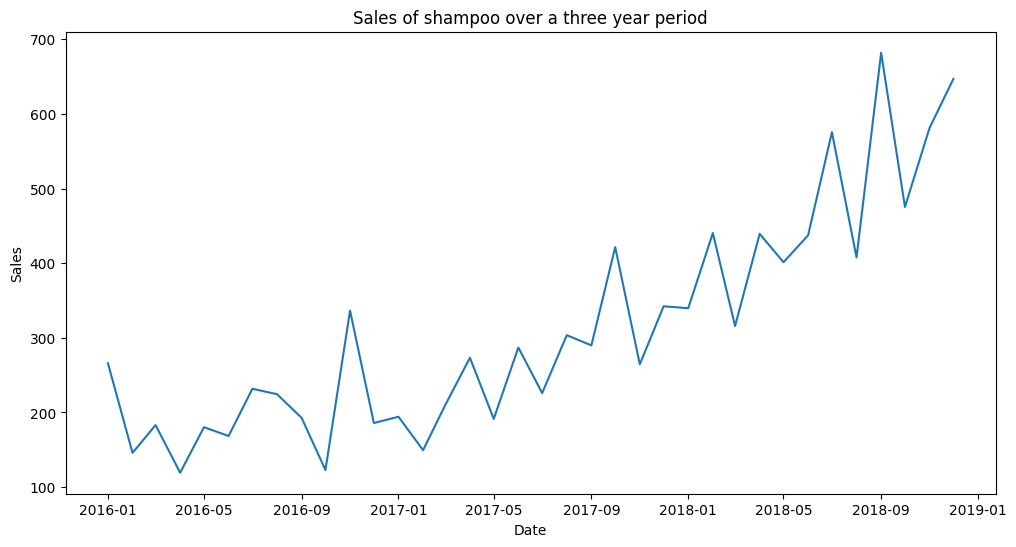

In [111]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Sales of shampoo over a three year period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [112]:
# Hàm seasonal_decompose dùng để phân tách chuỗi thời gian thành các thành phần:
# - Trend (xu hướng): thành phần dài hạn, thể hiện chiều hướng tăng/giảm
# - Seasonal (mùa vụ): thành phần lặp lại theo chu kỳ
# - Residual (phần dư): phần không giải thích được bởi trend và seasonal

# Có 2 mô hình phân tách:
# - Additive (cộng): Y = Trend + Seasonal + Residual
#   Dùng khi biên độ mùa vụ không thay đổi theo thời gian
# - Multiplicative (nhân): Y = Trend * Seasonal * Residual
#   Dùng khi biên độ mùa vụ tăng/giảm theo xu hướng

# Ở đây chọn mô hình multiplicative vì dữ liệu bán hàng thường có biên độ mùa vụ thay đổi theo xu hướng
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='multiplicative')

<Figure size 1200x600 with 0 Axes>

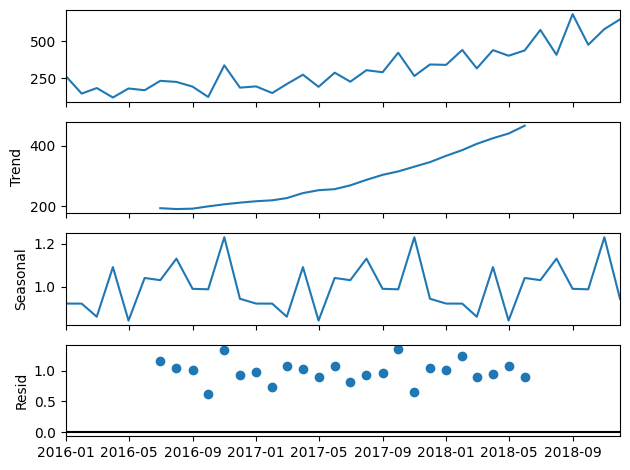

In [113]:
# Plot the original data, the trend, the seasonality, and the residuals
plt.figure(figsize=(12, 6))
decomposition.plot()
plt.show()

In [114]:
# Suppress warnings
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import auto_arima from pmdarima
from pmdarima import auto_arima

## AIC (The Akaike Information Criterion)
- AIC là một bộ ước lượng chất lượng tương đối của các mô hình thống kê cho một tập dữ liệu nhất định. Cung cấp một tập hợp các mô hình cho dữ liệu, AIC sẽ ước tính chất lượng của từng mô hình, liên quan đến từng mô hình khác.
- Giá trị AIC cho phép so sánh mô hình phù hợp với dữ liệu và tính đến độ phức tạp của mô hình, vì vậy các mô hình phù hợp hơn trong khi sử dụng ít tính năng hơn sẽ nhận được điểm AIC tốt hơn (thấp hơn) so với các mô hình tương tự sử dụng nhiều tính năng hơn.


## Thư viện ARIMA và Auto-ARIMA
- Thư viện **arima** cho phép ta nhanh chóng thực hiện grid search và tạo ra một *model object* để fit dữ liệu training.
- Thư viện này chứa hàm **auto_arima**, cho phép thiết lập một loạt các giá trị p, d, q, P, D, Q và m; sau đó fit các mô hình cho tất cả các kết hợp có thể. Cuối cùng, hàm sẽ chọn mô hình có giá trị AIC tốt nhất.

p, q, d (viết thường): Những tham số này xem xét mối liên hệ ngắn hạn, giống như việc thời tiết hôm nay (ví dụ: nhiệt độ, mưa) liên quan thế nào đến thời tiết hôm qua hoặc vài ngày trước đó.
- p: Xem xét nhiệt độ hôm nay phụ thuộc vào nhiệt độ mấy ngày liền kề trước đó.
- q: Xem xét sai số dự đoán nhiệt độ hôm nay phụ thuộc vào sai số dự đoán mấy ngày liền kề trước đó.
- d: Số lần bạn cần lấy hiệu giữa ngày hôm nay và ngày hôm qua để dữ liệu "bớt lên xuống thất thường" (trở nên ổn định hơn).

P, Q, D (viết HOA): Những tham số này xem xét mối liên hệ dài hạn theo mùa, giống như việc thời tiết hôm nay (ví dụ: 25 tháng 5 năm nay) liên quan thế nào đến thời tiết vào cùng ngày này năm ngoái (25 tháng 5 năm ngoái) hoặc vài năm trước đó. Chu kỳ mùa này được xác định bởi tham số m (ví dụ m=12 cho dữ liệu hàng tháng nghĩa là so sánh tháng này với tháng này năm ngoái).
- P: Xem xét nhiệt độ tháng này phụ thuộc vào nhiệt độ cùng tháng của mấy năm trước.
- Q: Xem xét sai số dự đoán nhiệt độ tháng này phụ thuộc vào sai số dự đoán cùng tháng của mấy năm trước.
- D: Số lần bạn cần lấy hiệu giữa tháng này và cùng tháng năm ngoái để dữ liệu theo mùa "bớt lên xuống thất thường".

In [115]:
# Sử dụng auto_arima để tự động tìm mô hình ARIMA tốt nhất
# ARIMA (AutoRegressive Integrated Moving Average) là mô hình dự báo chuỗi thời gian
model = auto_arima(df,
                   # Các tham số cho phần phi mùa vụ (non-seasonal)
                   start_p=1,    # Giá trị bắt đầu cho p (số lượng độ trễ tự hồi quy AR)
                   start_q=1,    # Giá trị bắt đầu cho q (số lượng độ trễ trung bình động MA)
                   max_p=5,      # Giá trị tối đa cho p (giới hạn tìm kiếm)
                   max_q=5,      # Giá trị tối đa cho q (giới hạn tìm kiếm)
                   d=1,          # Bậc sai phân để làm dừng chuỗi thời gian
                   
                   # Các tham số cho phần mùa vụ (seasonal)
                   m=12,         # Chu kỳ mùa vụ (12 tháng cho dữ liệu hàng tháng. Ví dụ: m=7 cho hàng ngày nếu chu kì theo tuần, m=4 cho hàng quý, m=52 cho hàng tuần, m=365 cho hàng ngày,... Chú ý: Nếu m=1 thì không có mùa vụ)
                   start_P=1,    # Giá trị bắt đầu cho P (số lượng độ trễ tự hồi quy mùa vụ)
                   start_Q=1,    # Giá trị bắt đầu cho Q (số lượng độ trễ trung bình động mùa vụ)
                   max_P=5,      # Giá trị tối đa cho P (giới hạn tìm kiếm)
                   max_Q=5,      # Giá trị tối đa cho Q (giới hạn tìm kiếm)
                   D=1,          # Bậc sai phân mùa vụ
                   
                   # Các tham số điều khiển quá trình tìm kiếm
                   error_action='ignore',    # Bỏ qua lỗi khi thử các mô hình
                   trace=True,               # Hiển thị quá trình tìm kiếm
                   suppress_warnings=True,   # Ẩn các cảnh báo
                   stepwise=True)            # Sử dụng tìm kiếm theo từng bước (nhanh hơn tìm kiếm lưới)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=305.954, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=287.610, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=289.951, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=287.696, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=287.722, Time=0.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=291.040, Time=0.45 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=303.591, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=286.460, Time=0.07 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=288.501, Time=0.04 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=287.268, T

In [116]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -138.732
Date:                             Fri, 18 Apr 2025   AIC                            285.464
Time:                                     01:54:00   BIC                            290.006
Sample:                                 01-01-2016   HQIC                           286.606
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5838      0.435     -1.342      0.179      -1.436       0.269
ma.L1         -0.5236      

In [117]:
# Split the data into train and test sets
train = df["2016-01-01":"2018-02-01"]
test = df["2018-02-01":]

In [118]:
# Fit the ARIMA model
model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [119]:
test_forecast = model.predict(n_periods=len(test))

In [120]:
forecast_table = pd.DataFrame(test_forecast, index=test.index, columns=['Prediction'])

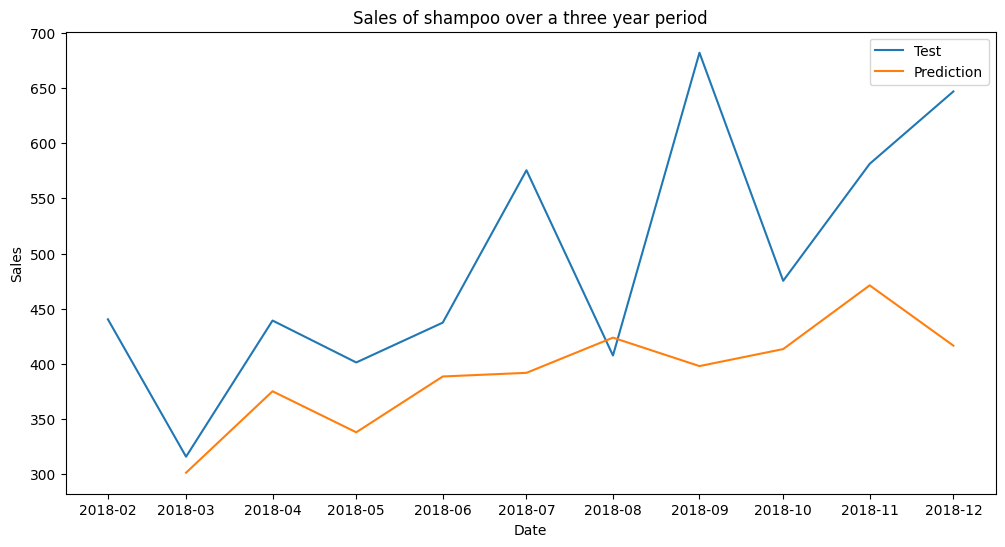

In [121]:
# Plot the test forecast
plt.figure(figsize=(12, 6))
plt.plot(test, label='Test')
plt.plot(forecast_table, label='Prediction')
plt.title('Sales of shampoo over a three year period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

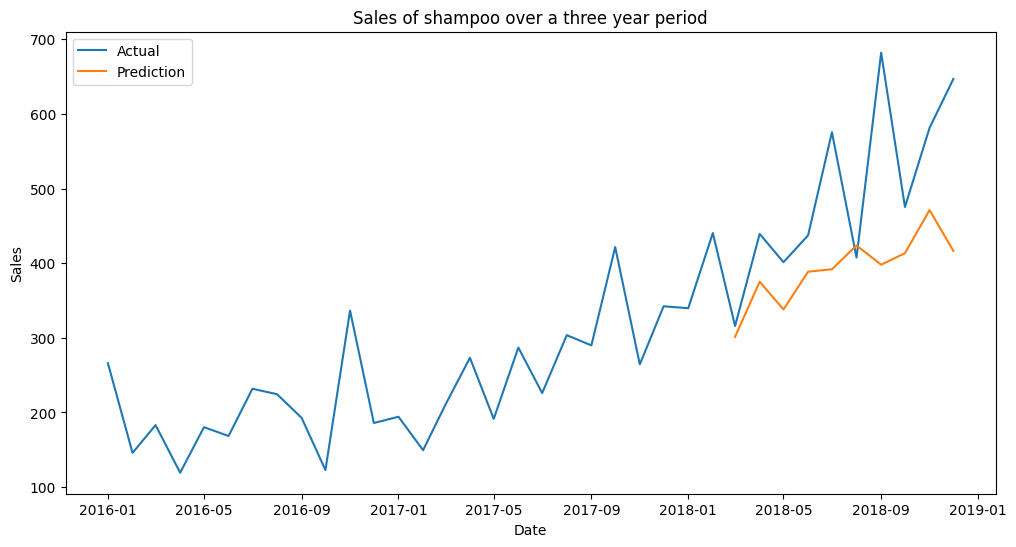

In [122]:
# Plot the test forecast with whole timeline
plt.figure(figsize=(12, 6))
plt.plot(df, label='Actual')
plt.plot(forecast_table, label='Prediction')
plt.title('Sales of shampoo over a three year period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Nhận xét:
Các tháng cuối năm 2018, dự báo không sát thực tế, có thể là do sự thay đổi đột biến về lượng sales mà tập train không được cập nhật đầy đủ.

In [123]:
# Fit the ARIMA model with the whole data
model.fit(df)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [124]:
# Predict the next 3 months
forecast = model.predict(n_periods=3)

In [125]:
forecast_table = pd.DataFrame(forecast, index=pd.date_range(start='2019-01-01', periods=3, freq='MS'), columns=['Prediction'])

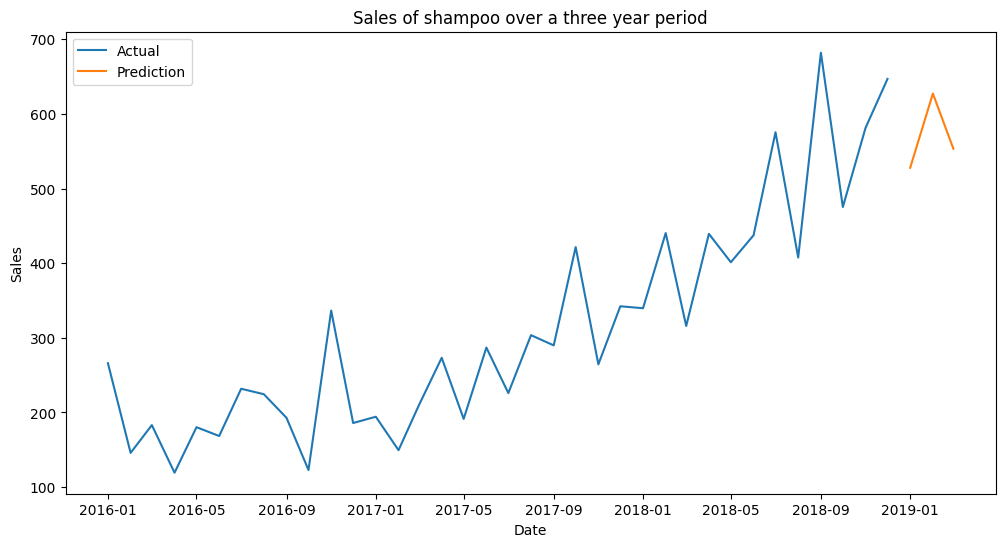

In [126]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Actual')
plt.plot(forecast_table, label='Prediction')
plt.title('Sales of shampoo over a three year period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

---
# Tìm parameter tốt nhất thủ công

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from time import time

register_matplotlib_converters()

import warnings

warnings.filterwarnings("ignore")

In [128]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [129]:
# Read the data
catfish_sales = pd.read_csv('data/catfish.csv', index_col=0, parse_dates=[0], date_parser=parser)
catfish_sales

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


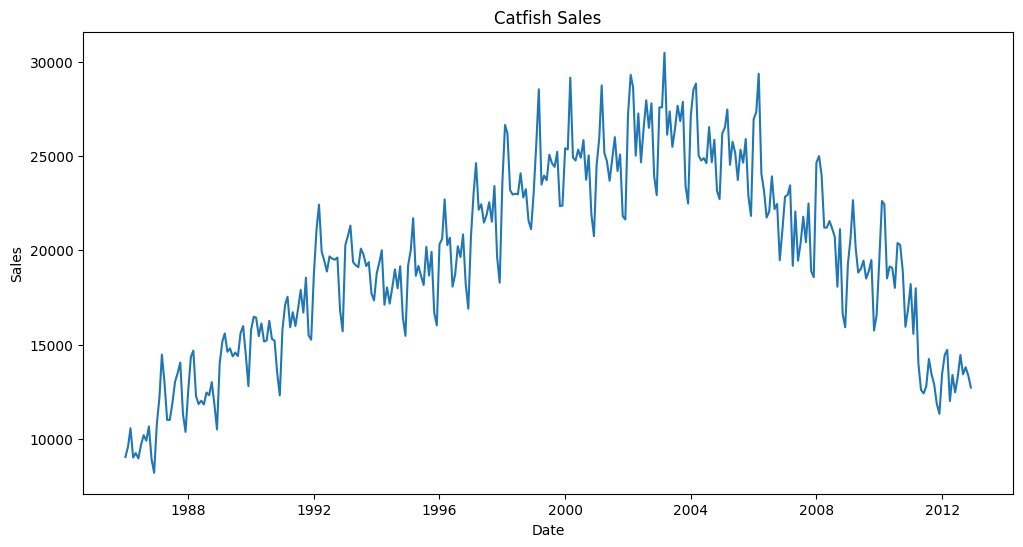

In [130]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(catfish_sales)
plt.title('Catfish Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [131]:
start_date = datetime(2000, 1, 1)
end_date = datetime(2004, 1, 1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [132]:
lim_catfish_sales.tail()

,Total
Date,
2003-09-01,26853
2003-10-01,27875
2003-11-01,23416
2003-12-01,22482
2004-01-01,27140


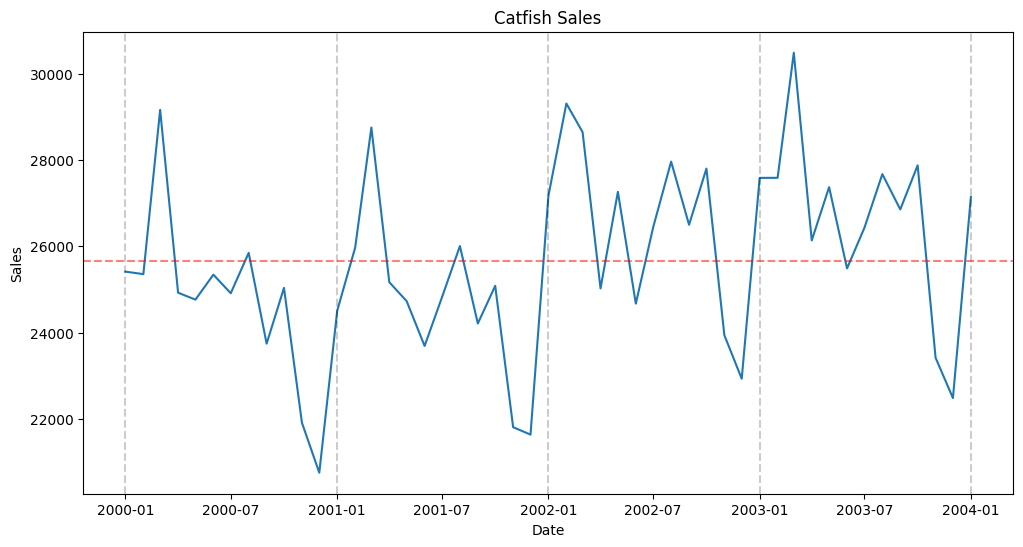

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
for year in range(2000, 2005):
    plt.axvline(datetime(year, 1, 1), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales.mean().item(), color='r', linestyle='--', alpha=0.5)
plt.show()

In [134]:
lim_catfish_sales.tail()

,Total
Date,
2003-09-01,26853
2003-10-01,27875
2003-11-01,23416
2003-12-01,22482
2004-01-01,27140


In [135]:
lim_catfish_sales.tail().diff(1)

,Total
Date,
2003-09-01,NaN
2003-10-01,1022.0
2003-11-01,-4459.0
2003-12-01,-934.0
2004-01-01,4658.0


In [136]:
first_diff = lim_catfish_sales.diff(1).dropna()

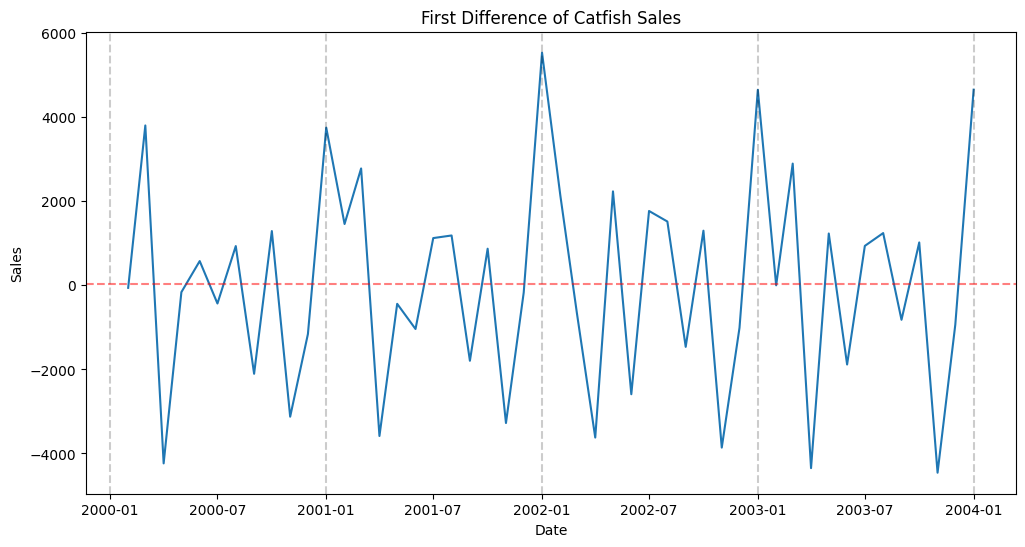

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
for year in range(2000, 2005):
    plt.axvline(datetime(year, 1, 1), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean().item(), color='r', linestyle='--', alpha=0.5)
plt.show()

# ACF (autocorrelation) and PACF (partial autocorrelation)
tự tương quan (ACF) và tự tương quan riêng phần (PACF).

Autocorrelation (ACF): là đồ thị thể hiện sự tương quan giữa chuỗi và độ trễ của chính nó. Đồ thị ACF sẽ được sử dụng để xác định bậc q của quá trình MA. Cách xác định cũng tương tự như xác định AR là căn cứ vào độ trễ lớn nhất nằm ngoài khoảng tin cậy 5%.

Partial autocorrelation (PACF): Đồ thị PACF sẽ được sử dụng để xác định bậc p của quá trình AR. Dựa vào đỉnh của đồ thị PACF với các mức trễ liên tiếp nhau. Nếu độ trễ lớn nhất có đỉnh nằm ngoài khoảng tin cậy 5% thì giá trị bậc của AR sẽ được quyết định bằng chính độ trễ này.

- ACF giúp xác định độ dài cho phần MA (Moving Average).
- PACF giúp xác định độ dài cho phần AR (AutoRegressive).

Ta có thể sử dụng biểu đồ ACF và PACF để xác định các giá trị của q (MA), p (AR) và  trong mô hình ARIMA.

https://people.duke.edu/~rnau/arimrule.htm

https://stats.stackexchange.com/questions/281666/how-does-acf-pacf-identify-the-order-of-ma-and-ar-terms/281726#281726

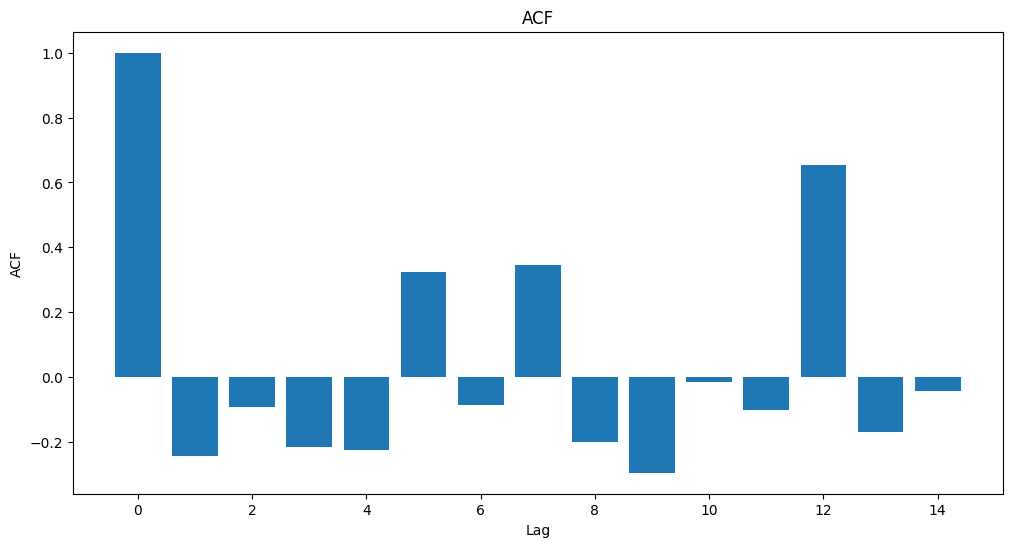

In [138]:
# ACF - autocorrelation 
num_lags = 15
acf_vals = acf(first_diff)

# Plot the ACF
plt.figure(figsize=(12, 6))
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.title('ACF')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

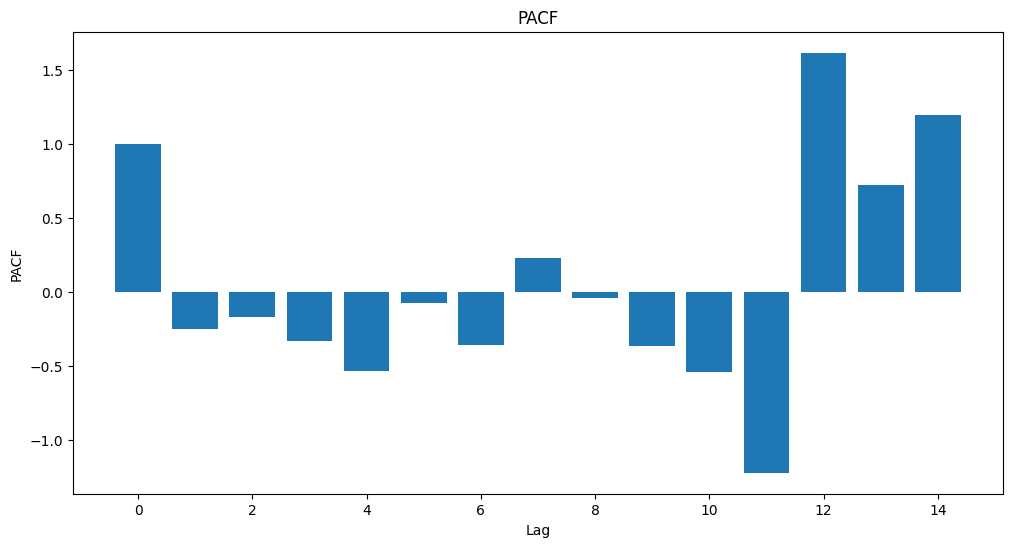

In [139]:
# PACF
pacf_vals = pacf(first_diff)

# Plot the PACF
plt.figure(figsize=(12, 6))
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.title('PACF')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

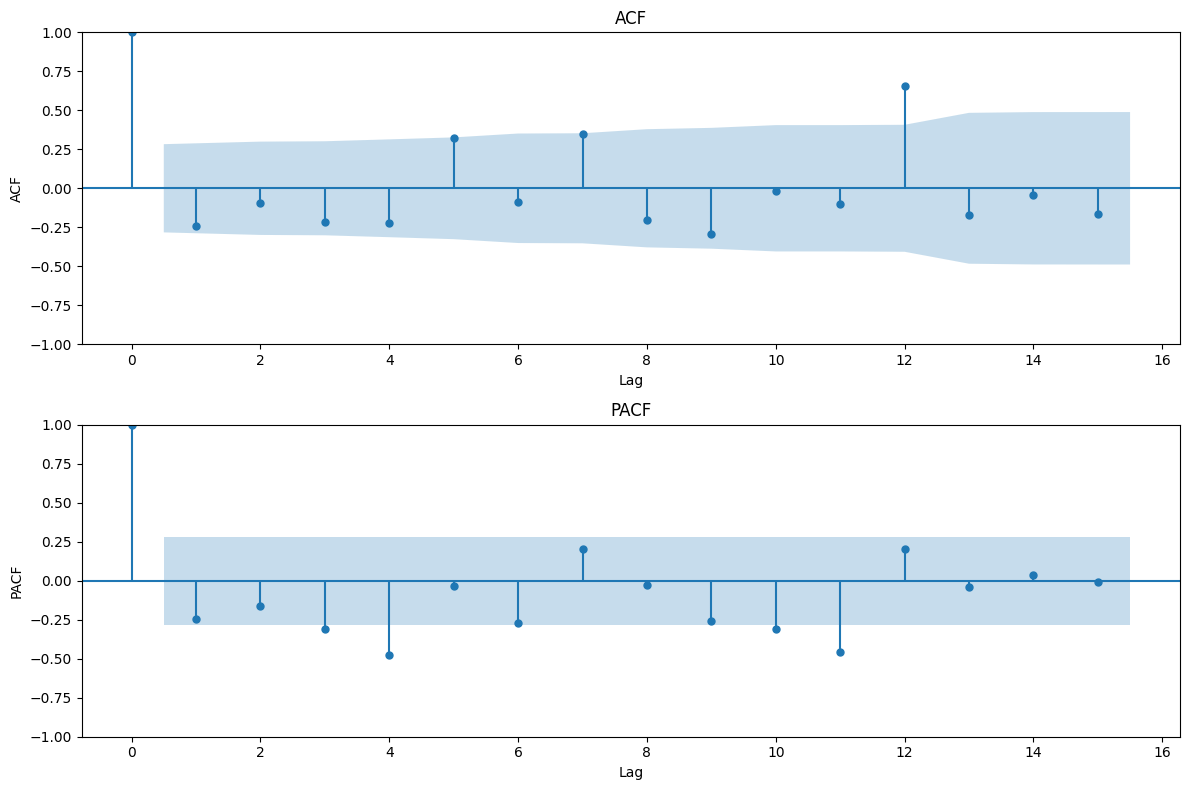

In [140]:
# ACF and PACF
fig = plt.figure(figsize=(12, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=15, ax=ax1)
ax1.set_title('ACF')
ax1.set_xlabel('Lag')
ax1.set_ylabel('ACF')

# Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=15, ax=ax2)
ax2.set_title('PACF')
ax2.set_xlabel('Lag')
ax2.set_ylabel('PACF')

plt.tight_layout()
plt.show()

#### Use ARIMA with p=4, d=1, q=12

In [162]:
train_end = datetime(2003, 7, 1)
test_end = datetime(2003, 12, 31)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [163]:
# Fit the model
model = ARIMA(train_data, order=(4, 1, 1))

In [164]:
# Fit the model
start_time = time()
model_fit = model.fit()
end_time = time()
print('Time to fit the model: {:.2f} seconds'.format(end_time - start_time))

Time to fit the model: 0.17 seconds


In [165]:
# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -370.888
Date:                Fri, 18 Apr 2025   AIC                            753.776
Time:                        01:56:26   BIC                            764.058
Sample:                    02-01-2000   HQIC                           757.520
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5044      0.137     -3.683      0.000      -0.773      -0.236
ar.L2         -0.3096      0.157     -1.977      0.048      -0.617      -0.003
ar.L3         -0.4701      0.217     -2.165      0.0

In [166]:
# Get prediction start and end dates
pred_start = test_data.index[0]
pred_end = test_data.index[-1]

In [167]:
# Get the predictions and residuals
predictions = model_fit.predict(start=pred_start, end=pred_end)

Text(0, 0.5, 'Sales')

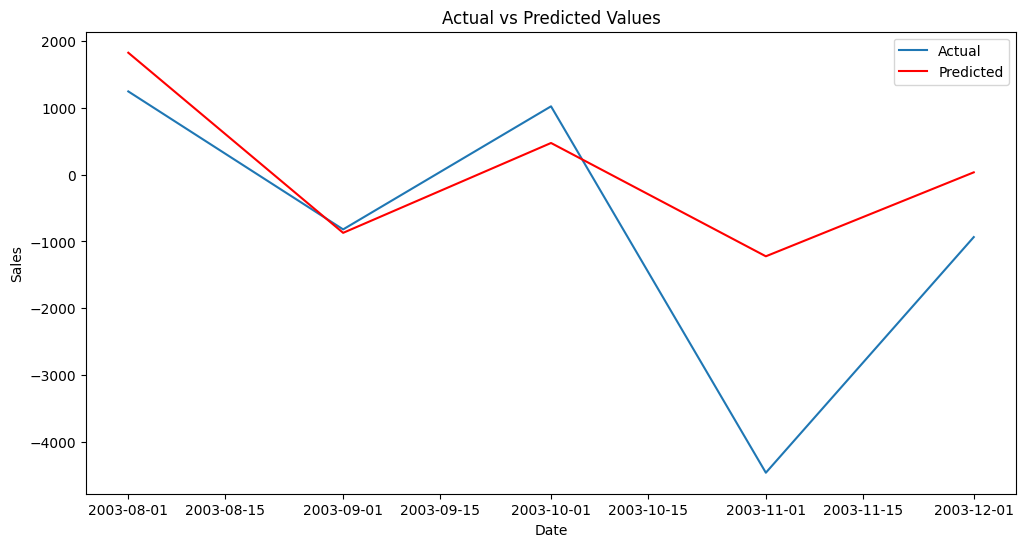

In [168]:
# Plot the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, color='r', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Sales')